# IMPORTING LIBRARIES

In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split

# IMPORTING DATASET

In [2]:
df = pd.read_csv('Spam Email Detection - spam.csv')
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [3]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# DATA CLEANING

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df1 = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1)

In [7]:
df1.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df1.rename(columns = {"v1" : "Spam or Ham", "v2":"Mail Message"},inplace = True)
df1.head()

,Spam or Ham,Mail Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df1.shape

(5572, 2)

# DATA PROCESSING

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1['Spam or Ham'] = encoder.fit_transform(df1['Spam or Ham'])

In [10]:
df1.describe

<bound method NDFrame.describe of      Spam or Ham                                       Mail Message
0            ham  Go until jurong point, crazy.. Available only ...
1            ham                      Ok lar... Joking wif u oni...
2           spam  Free entry in 2 a wkly comp to win FA Cup fina...
3            ham  U dun say so early hor... U c already then say...
4            ham  Nah I don't think he goes to usf, he lives aro...
...          ...                                                ...
5567        spam  This is the 2nd time we have tried 2 contact u...
5568         ham              Will �_ b going to esplanade fr home?
5569         ham  Pity, * was in mood for that. So...any other s...
5570         ham  The guy did some bitching but I acted like i'd...
5571         ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [12]:
df1.duplicated().sum()

409

In [13]:
df1 = df1.drop_duplicates(keep = 'first')

In [14]:
df1.duplicated().sum()

0

In [15]:
X =  df1["Mail Message"]
y =df1["Spam or Ham"]

# PERFORMING TRAIN TEST SPLIT

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_count = cv.fit_transform(X_train.values)
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# MODEL FITTING

In [18]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [48]:
from sklearn.metrics import confusion_matrix , recall_score , precision_score
from sklearn.metrics import accuracy_score

In [49]:
mail_ham = ['Same. Wana plan a trip sometme then']
mail_ham_count = cv.transform(mail_ham)
y_ptest = model.predict(mail_ham_count)
y_ptest

array([0])

In [50]:
model.score(X_train_count,y_train)

0.9929782082324455

In [51]:
X_test_count = cv.transform(X_test)
model.score(X_test_count,y_test)

0.9835430784123911

# DATA VISUALIZATION

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')

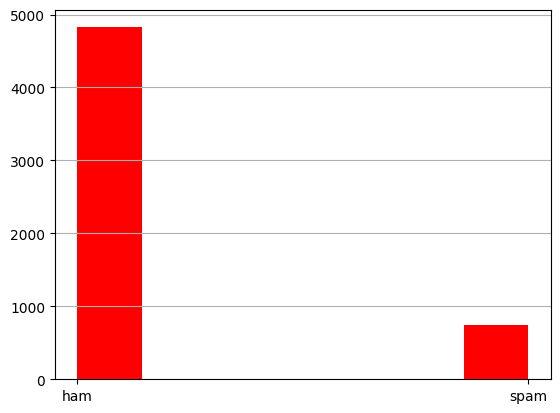

In [53]:
plt.hist(df['v1'], color='r',bins=7)
plt.grid(axis='y')
plt.show()

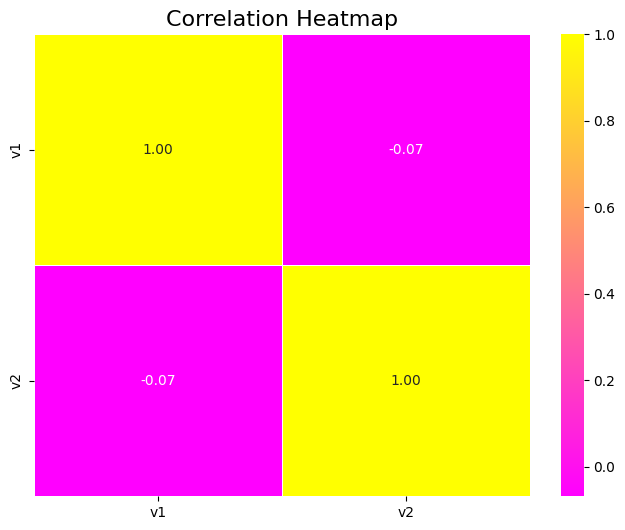

In [69]:
np.random.seed(0)
data = pd.DataFrame(np.random.rand(100, 2), columns=['v1', 'v2'])

corr_matrix = data.corr()

plt.figure(figsize=(8, 6))
plt.title("Correlation Heatmap", fontsize=16)

sns.heatmap(corr_matrix, annot=True, cmap="spring", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [55]:
import plotly.express as px

fig = px.scatter(df, x="v1", y="v2")


In [ ]:
fig.show()